Plan for the Project:

Data Loading: Load the data from the provided path and explore the columns: title, text, and label.

Preprocessing: We'll use the text column for training since it contains the body of the news articles. We may also use title in combination if needed.

Modeling: Use FastAI’s NLP tools to create a text classifier that identifies whether a news article is fake or real based on the text.

Evaluation: Evaluate model performance using metrics like accuracy and confusion matrix.

Documentation: Comment and document each step of the process thoroughly.

Let's start by adapting the notebook:

We will:
1. Load and prepare the data.
2. Tokenize the text and set up DataLoaders for FastAI.

In [2]:
# Import necessary libraries
from fastai.text.all import *

# Load the dataset
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

# Preview the dataset
df.head()

# Split data into training and validation sets
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', valid_pct=0.2, is_lm=False)

# Show a batch of data
dls.show_batch()

,text,category
0,"xxbos xxmaj the xxmaj hard xxmaj working xxmaj american vs. xxmaj the xxmaj government xxmaj parasite xxmaj by xxmaj michael xxmaj snyder , on xxmaj april 10th , 2012 \n xxmaj which lifestyle choice produces better results – being a hard working xxmaj american or being a government parasite ? xxmaj actually , when you look at the cold , hard numbers they may just surprise you . xxmaj in xxmaj america today , we deeply penalize hard work and we greatly reward government dependence . xxmaj if you live in a very liberal area of the country and you know how to game the system , it is entirely possible to live a comfortable existence without ever working too much at all . xxmaj in fact , there are some xxmaj americans that have been living off of “ government benefits ” for decades . xxmaj many of these",1
1,"xxbos xxmaj home / xxup breaking xxup news / xxup breaking : xxmaj officer xxmaj charged for xxmaj killing xxmaj innocent xxmaj unarmed xxmaj father xxmaj with xxmaj his xxmaj hands xxmaj up on xxmaj video xxup breaking : xxmaj officer xxmaj charged for xxmaj killing xxmaj innocent xxmaj unarmed xxmaj father xxmaj with xxmaj his xxmaj hands xxmaj up on xxmaj video \n xxup update : xxmaj on xxmaj thursday afternoon , xxmaj district xxmaj attorney xxmaj steve xxmaj xxunk directed his staff to file a first - degree manslaughter charge against xxmaj officer xxmaj betty xxmaj shelby in the fatal shooting of xxmaj terence xxmaj crutcher . xxmaj according to the xxmaj tulsa xxmaj world report : \n a warrant has been issued for her arrest and arrangements made for her surrender . \n xxmaj xxunk filed the charge after reviewing dash cam video and helicopter video that",1
2,"xxbos xxmaj the xxmaj velocity xxmaj of xxmaj money xxmaj in xxmaj the xxup u.s . xxmaj falls xxmaj to xxmaj an all - time xxmaj record xxmaj low xxmaj by xxmaj michael xxmaj snyder , on xxmaj june 1st , 2014 \n xxmaj when an economy is healthy , there is lots of buying and selling and money tends to move around quite rapidly . xxmaj unfortunately , the xxup u.s . economy is the exact opposite of that right now . xxmaj in fact , as i will document below , the velocity of xxup m2 has fallen to an all - time record low . xxmaj this is a very powerful indicator that we have entered a deflationary era , and the xxmaj federal xxmaj reserve has been attempting to combat this by absolutely flooding the financial system with more money . xxmaj this has created some",1
3,"xxbos xxmaj hillary xxmaj clinton ’s email problems began in her first days as secretary of state . xxmaj she insisted on using her personal blackberry for all her email communications , but she was n’t allowed to take the device into her seventh - floor suite of offices , a secure space known as xxmaj mahogany xxmaj row . \n\n xxmaj for xxmaj clinton , this was frustrating . xxmaj as a political heavyweight and chief of the nation ’s diplomatic corps , she needed to manage a torrent of email to stay connected to colleagues , friends and supporters . xxmaj she hated having to put her blackberry into a xxunk before going into her own office . \n\n xxmaj her aides and senior officials pushed to find a way to enable her to use the device in the secure area . xxmaj but their efforts unsettled the",0
4,"xxbos xxmaj do roses know their thorns can hurt ? a quote attributed to jonben t xxmaj ramsey from xxmaj lawrence xxmaj schiller s xxmaj perfect xxmaj murder , xxmaj perfect xxmaj town xxmaj shawn xxmaj helton 21st xxmaj century xxunk s been nearly 20 years since the cold - blooded murder of jonben t xxmaj ramsey shocked xxmaj america . xxmaj on xxmaj december 26 , 1996 , the lifeless body of a 6 - year - old girl , jonben t xxmaj ramsey , was found brutally murdered in the basement of her family home . xxmaj the grisly discovery stunned a quiet and affluent community in xxmaj boulder , xxmaj colorado and quickly became one of the most disturbing unsolved crimes in the xxmaj united xxmaj states 

1. Load and Explore the Data

We’ll first load the dataset and take a look at it to make sure it’s structured correctly for FastAI.

2. Text Data Preparation

We’ll tokenize the text data and set up the DataLoaders, which will handle batching and shuffling of data for training.

3. Building the Model

We’ll use FastAI’s text_classifier_learner to create the model. FastAI automatically handles a lot of the complexity behind the scenes, making it easy to fine-tune models.

In [7]:
# Import necessary libraries from fastai.text
from fastai.text.all import *

# Load the dataset from the file path
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

# Sample 10% of the dataset for faster experimentation
df_sample = df.sample(frac=0.1, random_state=42)

# Create the DataLoaders for text classification (80% training, 20% validation)
# Adjust the batch size for faster processing
dls = TextDataLoaders.from_df(df_sample, text_col='text', label_col='label', valid_pct=0.2, bs=64)

# Show a batch of the data to ensure everything is loading properly
dls.show_batch(max_n=5)


,text,category
0,"xxbos xxmaj george xxmaj soros xxmaj is xxmaj preparing xxmaj for xxmaj economic xxmaj collapse – xxmaj does xxmaj he xxmaj know xxmaj something xxmaj that xxmaj you xxmaj do n’t ? xxmaj june 9th , 2016 \n xxmaj why is xxmaj george xxmaj soros selling stocks , buying gold and making “ a series of big , bearish investments ” ? xxmaj if things stay relatively stable like they are right now , these moves will likely cost xxmaj george xxmaj soros a tremendous amount of money . xxmaj but if a major financial crisis is imminent , he stands to make obscene returns . xxmaj so does xxmaj george xxmaj soros know something that the rest of us do not ? xxmaj could it be possible that he has spent too much time reading websites such as xxmaj the xxmaj economic xxmaj collapse xxmaj blog ? xxmaj what",1
1,"xxbos xxmaj on xxmaj monday , xxmaj jan . 9 , less than two weeks before xxmaj president xxmaj trump ’s inauguration , the xxmaj house speaker , xxmaj paul xxmaj ryan , hosted a dinner at his office in the xxmaj capitol with members of xxmaj trump ’s inner circle . xxmaj the guests included the ’s chief xxmaj white xxmaj house strategist , xxmaj stephen xxup k. xxmaj bannon his and family consigliere , xxmaj jared xxmaj kushner his chief of staff , xxmaj reince xxmaj priebus his economic adviser , xxmaj gary xxmaj cohn his nominee for xxmaj treasury secretary , xxmaj steven xxmaj mnuchin his incoming deputy chief of staff , xxmaj rick xxmaj dearborn and his director , xxmaj marc xxmaj short . xxmaj the ostensible purpose of the dinner was to discuss the details of xxmaj trump ’s legislative agenda — in particular ,",0
2,"xxbos xxmaj there is a smug style in xxmaj american liberalism . xxmaj it has been growing these past decades . xxmaj it is a way of conducting politics , predicated on the belief that xxmaj american life is not divided by moral difference or policy divergence not really but by the failure of half the country to know what 's good for them . \r\n\r\n xxmaj in 2016 , the smug style has found expression in media and in policy , in the attitudes of liberals both visible and private , providing a foundational set of assumptions above which a great number of liberals xxunk their understanding of the world . \r\n\r\n xxmaj it has led an xxmaj american ideology hitherto responsible for a great share of the good accomplished over the past century of our political life to a posture of reaction and disrespect : a condescending ,",0
3,"xxbos xxmaj shawn xxmaj helton 21st xxmaj century wirethe 1994 cult film xxmaj natural xxmaj born xxmaj killers , is an examination of media manipulation , archetypal psychology and the violence embedded within xxmaj american pop xxunk it s been more than two decades since xxmaj natural xxmaj born xxmaj killers ( nbk ) first shocked viewers with its adrenaline fueled brutality , biting satire and darkly ironic media montages , the enigmatic picture s overall depiction of the xxmaj american media complex is just as effective today . xxup chaos xxup road xxmaj mickey and xxmaj mallory xxmaj knox are depraved icons in the twisted world of xxup nbk . ( photo illustration : xxmaj shawn xxunk the film s jarring surface , we see xxmaj xxunk ( portrayed by xxmaj woody xxmaj harrelson ) and xxmaj mallory xxmaj knox ( juliet xxmaj lewis ) metaphorically reborn ( from",1
4,"xxbos xxmaj the last time xxmaj steve xxmaj kerr was in xxmaj beirut , his birthplace , with the bombs pounding the runway and the assassination of his father six months away , he left by car . xxmaj the airport was closed . xxmaj there was talk of taking a cruise ship to xxmaj cyprus , or accompanying an ambassador on a helicopter to xxmaj tel xxmaj aviv or even crossing into xxmaj israel on a bus . a military plane headed to xxmaj cairo had an empty seat , but it went to someone else . xxmaj finally , a hired driver took xxmaj kerr over the xxmaj lebanon xxmaj mountains and across the xxmaj syrian border to xxmaj damascus , 

**Training the Model:**

Once the data is loaded and tokenized, we’ll train the model using the following:

In [8]:
# Build a text classifier using a pre-trained language model
# Using a smaller drop_mult value to make the model faster
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

# Enable mixed precision training to speed up the process
learn = learn.to_fp16()

# Fine-tune the model for fewer epochs initially (start with 1)
learn.fine_tune(1)

# Evaluate model performance
learn.show_results()

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.314802,0.264229,0.898058,00:55


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.196271,0.146754,0.945215,01:47


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


,text,category,category_
0,"xxbos xxmaj references xxmaj the xxmaj debate \n xxmaj it started when xxmaj daniel xxmaj blatman , an xxmaj israeli historian and head of the xxmaj institute for xxmaj contemporary xxmaj jewry at the xxmaj hebrew xxmaj university of xxmaj jerusalem , penned an op - ed for the xxmaj israeli daily xxmaj haaretz stating that ethnic cleansing “ is exactly what happened in 1948 . ” xxmaj to support this , xxmaj blatman cited xxmaj benny xxmaj morris : the xxmaj israeli historian , xxmaj blatman wrote , “ determined that most of the xxmaj arabs in the country , over 400 , xxrep 3 0 , were encouraged to leave or expelled in the first stage of the war — even before the xxmaj arab nations ’ armies invaded . ” [ 2 ] xxmaj benny xxmaj morris , xxmaj october 30 , 2007 ( xxmaj aude /",1,1
1,"xxbos xxmaj washington , xxup dc xxunk xxmaj dear xxmaj mr . xxmaj harwood , xxmaj though the xxmaj washington xxmaj post does not over - extend itself in the pursuit of hard news , just let drop the faintest rumor of a government "" conspiracy "" , and a xxunk horn goes off in the news room . xxmaj aroused from apathy in the daily routine of reporting xxunk and various other political and social sports events , editors and reporters scramble to the phones . xxmaj the xxunk screams its warning : the greatest single threat to herd - journalism , corporate profits , and government stability -- the dreaded "" conspiracy xxup theory "" ! ! xxmaj it is not known whether anyone has actually been xxunk or accosted by any of these frightful xxunk , but their presence is announced to xxmaj post readers with a",1,1
2,"xxbos xxmaj there have been many articles written about xxmaj george xxmaj soros and his collectivist activism . xxmaj soros is a business magnate , investor , philanthropist , and author who is of jewish - hungarian ancestry and holds dual citizenship . xxmaj he is chairman of xxmaj soros xxmaj fund xxmaj management . xxmaj discover the xxmaj networks has published a comprehensive list of organizations funded by xxmaj soros and his xxmaj open xxmaj society xxunk of these groups have actively opposed xxmaj donald xxmaj trump for president and may be part of the recent levels of violence and chaos seen at his rallies . xxmaj many of the groups favor : open borders , amnesty , giving illegals voting rights , xxmaj muslim migration and social xxunk xxmaj project : xxmaj this organization works to organize communities of color into politically cohesive units while disseminating its leftist",1,1
3,"xxbos xxmaj one of the ancillary benefits of xxmaj donald xxmaj trump s xxunk into the xxup us political scene has been a forceful injection of realism into the national political discourse . xxmaj one of those points of discussion is centered around the concept of a state within a state , commonly referred to as the xxmaj deep xxmaj state . xxmaj it s suddenly become an acceptable mainstream idea , but prior to the 2016 election cycle , that conversation was strictly a fringe affair , mostly relegated to the realms of conspiracy forums and alternative media . but now it s written and spoken about as a mainstream talking point . xxmaj one of the most coherent xxunk of this idea originated from a former xxup us xxmaj congressional staffer turned best - selling author , xxmaj mike xxmaj lofgren . xxmaj in his book , xxmaj",1,1
4,"xxbos xxmaj in xxmaj hillary 's xxmaj america , email server xxunk you \n xxmaj obama transfers his xxmaj nobel xxmaj peace xxmaj prize to anti - trump rioters \n xxmaj democrats blame xxmaj hillary 's criminal e - mail server for her loss , demand it face prison \n xxmaj afraid of "" dangerous "" xxmaj trump presidency , protesters pre - emptively burn xxmaj america down to the ground \n xxmaj clinton xxmaj foundation in foreclosure as foreign donors demand refunds \n xxmaj hillary xxmaj clinton blames youtube video for unexpected and spontaneous voter uprising that prevented her inevitable move into the x

**Evaluate the Model**

Let's check how well the model performed on the validation set. This involves looking at the accuracy, confusion matrix, and analyzing specific predictions.

/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


,text,category,category_
0,"xxbos xxmaj references xxmaj the xxmaj debate \n xxmaj it started when xxmaj daniel xxmaj blatman , an xxmaj israeli historian and head of the xxmaj institute for xxmaj contemporary xxmaj jewry at the xxmaj hebrew xxmaj university of xxmaj jerusalem , penned an op - ed for the xxmaj israeli daily xxmaj haaretz stating that ethnic cleansing “ is exactly what happened in 1948 . ” xxmaj to support this , xxmaj blatman cited xxmaj benny xxmaj morris : the xxmaj israeli historian , xxmaj blatman wrote , “ determined that most of the xxmaj arabs in the country , over 400 , xxrep 3 0 , were encouraged to leave or expelled in the first stage of the war — even before the xxmaj arab nations ’ armies invaded . ” [ 2 ] xxmaj benny xxmaj morris , xxmaj october 30 , 2007 ( xxmaj aude /",1,1
1,"xxbos xxmaj washington , xxup dc xxunk xxmaj dear xxmaj mr . xxmaj harwood , xxmaj though the xxmaj washington xxmaj post does not over - extend itself in the pursuit of hard news , just let drop the faintest rumor of a government "" conspiracy "" , and a xxunk horn goes off in the news room . xxmaj aroused from apathy in the daily routine of reporting xxunk and various other political and social sports events , editors and reporters scramble to the phones . xxmaj the xxunk screams its warning : the greatest single threat to herd - journalism , corporate profits , and government stability -- the dreaded "" conspiracy xxup theory "" ! ! xxmaj it is not known whether anyone has actually been xxunk or accosted by any of these frightful xxunk , but their presence is announced to xxmaj post readers with a",1,1
2,"xxbos xxmaj there have been many articles written about xxmaj george xxmaj soros and his collectivist activism . xxmaj soros is a business magnate , investor , philanthropist , and author who is of jewish - hungarian ancestry and holds dual citizenship . xxmaj he is chairman of xxmaj soros xxmaj fund xxmaj management . xxmaj discover the xxmaj networks has published a comprehensive list of organizations funded by xxmaj soros and his xxmaj open xxmaj society xxunk of these groups have actively opposed xxmaj donald xxmaj trump for president and may be part of the recent levels of violence and chaos seen at his rallies . xxmaj many of the groups favor : open borders , amnesty , giving illegals voting rights , xxmaj muslim migration and social xxunk xxmaj project : xxmaj this organization works to organize communities of color into politically cohesive units while disseminating its leftist",1,1
3,"xxbos xxmaj one of the ancillary benefits of xxmaj donald xxmaj trump s xxunk into the xxup us political scene has been a forceful injection of realism into the national political discourse . xxmaj one of those points of discussion is centered around the concept of a state within a state , commonly referred to as the xxmaj deep xxmaj state . xxmaj it s suddenly become an acceptable mainstream idea , but prior to the 2016 election cycle , that conversation was strictly a fringe affair , mostly relegated to the realms of conspiracy forums and alternative media . but now it s written and spoken about as a mainstream talking point . xxmaj one of the most coherent xxunk of this idea originated from a former xxup us xxmaj congressional staffer turned best - selling author , xxmaj mike xxmaj lofgren . xxmaj in his book , xxmaj",1,1
4,"xxbos xxmaj in xxmaj hillary 's xxmaj america , email server xxunk you \n xxmaj obama transfers his xxmaj nobel xxmaj peace xxmaj prize to anti - trump rioters \n xxmaj democrats blame xxmaj hillary 's criminal e - mail server for her loss , demand it face prison \n xxmaj afraid of "" dangerous "" xxmaj trump presidency , protesters pre - emptively burn xxmaj america down to the ground \n xxmaj clinton xxmaj foundation in foreclosure as foreign donors demand refunds \n xxmaj hillary xxmaj clinton blames youtube video for unexpected and spontaneous voter uprising that prevented her inevitable move into the x

/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/conda/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       719
           1       0.93      0.96      0.95       723

    accuracy                           0.95      1442
   macro avg       0.95      0.95      0.95      1442
weighted avg       0.95      0.95      0.95      1442



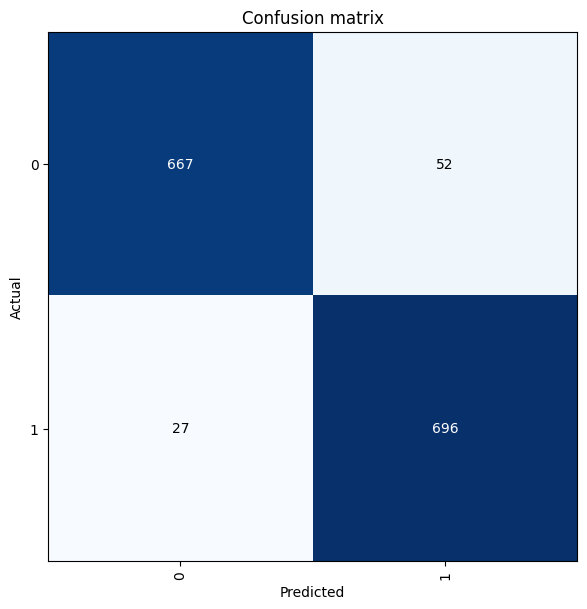

In [9]:
# Show results on a batch of validation data
learn.show_results()

# Check model performance using a confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

# Print out the classification report with precision, recall, and F1-score
interp.print_classification_report()

In [14]:
# Save the trained model
learn.export('fake_news_classifier.pkl')